# ALGORITMOS DE CLASIFICACIÓN



## 📌ACTIVIDAD 1:  MNIST
 MNIST es un conjunto de pequeñas imágenes de dígitos escritos por estudiantes de institutos y
empleados del censo de USA. Cada imagen está etiquetada con el dígito que representa. Crea el
notebook saa_02_p04_a1_<tus_iniciales>.ipynb donde realizar esta actividad.<br><br>
 Nota: recuerda que los datasets cargados por scikit-Learn tienen estructura de diccionario
incluyendo entre otras las claves:<br><br>
 • DESCR: descripción del dataset.<br>
 • data: DataFrame de pandas con una fila por instancia o ejemplo de datos y una
columna por cada característica.<br>
 • target: un array con los labels de cada instancia.<br><br>
 Comprobamos la cantidad de datos y separamos predictoras y target

In [1]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)
print("Claves de mnist: ", mnist.keys())

X, y = mnist["data"], mnist["target"]
print("Dimensiones de X:", X.shape)

Claves de mnist:  dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])
Dimensiones de X: (70000, 784)


## PASO 1: PREPARAR LOS DATOS.
Tiene imágenes cada una con 784 características porque son de tamaño 28×28 pixels y cada pixel
representa la intensidad de luz (0 blanco a 255 el negro). Tiene aproximadamente la misma cantidad
de ejemplos para cada dígito (0, 1, …, 9). Para dibujar una de ellos lo único que tienes que hacer es
extraer una instancia, cambiarle la estructura a 28×28 y usar la función imshow() de matplotlib:

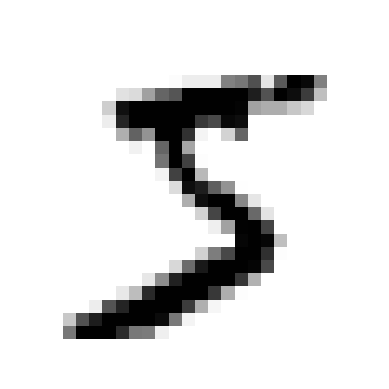

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt

un_digito = X.iloc[0].to_numpy()
imagen_un_digito = un_digito.reshape(28, 28)

plt.imshow(imagen_un_digito, cmap=mpl.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()


Vamos a entrenar modelos de clasificación binaria que aprendan a identificar los números 2 del resto.
Primero vamos a cambiar el tipo de datos del target porque nos interesa que sean numéricos 0 (si no es
un 2 y 1 cuando sea la imagen de un dígito 2). Además vamos a generar el dataset de train y test, y
luego lo vamos a adaptar para que nos sirva para entrenar el clasificador del 2. El tamaño del test lo
dejamos al 1% porque hay bastantes instancias:


In [3]:
import numpy as np
from sklearn.model_selection import train_test_split

y = y.iloc[:].to_numpy()
y = y.astype(np.uint8)

print("Nuevo tipo de y[0]:", type(y[0]))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y, random_state=123)

y_train_2 = (y_train == 2)
y_test_2 = (y_test == 2)  # True para todas las instancias que sean del dígito 2


Nuevo tipo de y[0]: <class 'numpy.uint8'>


### ENTREGAR:
 a) Modifica el código para que en la variable
un_digito
 quede cargada la primera instancia que
sea un 2.<br><br>
 b)
Cuando particiones los datos y realices otras operaciones aleatorias utiliza una semilla
aleatoria que coincida con la longitud de tu nombre concatenada a la de tu primer apellido y
concatenada a la de tu segundo apellido. En mi caso sería el valor 449 porque "Jose"=4,
"Rosa"=4 y "=9.<br><br>
 c) Indica cuantas instancias tenemos para entrenar y cuantas para testear.

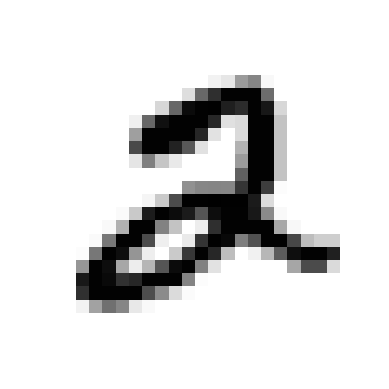

Instancias de entrenamiento: 63000
Instancias de testeo: 7000


In [4]:
# a) Encontrar la primera instancia que sea un 2
dice_dos = np.where(y == 2)[0][0]  # Encuentra el primer índice donde y es 2
un_digito = X.iloc[dice_dos].to_numpy()
imagen_un_digito = un_digito.reshape(28, 28)

# Mostrar la imagen del primer dígito 2
plt.imshow(imagen_un_digito, cmap=mpl.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

# b) Usar una semilla aleatoria personalizada
semilla_aleatoria = int("675")  # Modifica este valor según la  ongitud de tu nombre completo

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y, random_state=semilla_aleatoria)

# c) Imprimir cantidad de instancias para entrenamiento y testeo
print(f"Instancias de entrenamiento: {X_train.shape[0]}")
print(f"Instancias de testeo: {X_test.shape[0]}")

 ## PASO 2: ENTRENAR UN MODELO QUE IDENTIFIQUE EL DÍGITO 2
 Para identificar el número 2 del resto, necesitamos un clasificador binario (2 clases en las que clasificar
una instancia). Usamos uno que use Descenso por Gradiente Estocástico (SGDClassifier) que es
escalable (rápido con muchas filas o instancias) y apto para on-line al ir aprendiendo instancia a
instancia de manera independiente.

In [5]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(random_state=123)
sgd.fit(X_train, y_train_2)

SGDClassifier(random_state=123)

 Para comprobar si se ha entrenado bien podemos probar la predicción que hace con algún ejemplo
que conozcamos como por ejemplo el que tenemos en un_digito:

In [6]:
print("Predice un 2?:", sgd.predict([un_digito]))

Predice un 2?: [ True]


C:\Users\ESP\Desktop\MachineLearning\saa\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


Pero lo ideal es medir lo bien que lo hace en muchos datos y además para que el resultado sea fiable
esos datos no deben tener sesgos. Así que voy a obtener sus éxitos en varios conjuntos de datos
usando validación cruzada de 3-Folds. <br><br>
 Usamos la función  cross_val_score() para validar el clasificador usando k-folds validación cruzada
con un k de 3 (recuerda que la 3-folds validación cruzada divide el dataset train en 3 trozos y recorre
todos los trozos validando en cada uno el modelo que entrena con el resto de trozos). Copia este
código a continuación y completa los apartados que hay que entregar:

In [7]:
from sklearn.model_selection import cross_val_score
cvs = cross_val_score(sgd, X_train, y_train_2, cv=3, scoring="accuracy")
print(f"SGD: Accuracy en 3-folds: {cvs} Media: {cvs.mean()*100:.4f}%")

SGD: Accuracy en 3-folds: [0.71971429 0.84214286 0.83190476] Media: 79.7921%


 ### ENTREGAR:
 a)
 ¿Qué porcentaje de aciertos tiene el modelo cuando realiza predicciones? <br><br>
b)
 Siendo un clasificador, ¿Si se acerca al 100% es un buen indicador de que ha aprendido bien?<br><br>
 c)
 Escribe el código del clasificador
“Siempre Negativo”
 manera que hemos realizado con
 de abajo y comprueba de la misma
SGDClassifier
 si hace su trabajo con éxito (ten en cuenta que
no necesita entrenamiento, cuando le pregunten si es un 2 siempre va a responder que no) por
tanto no lo entrenes, solo lo validas y compruebas sus porcentajes de éxitos con este
comportamiento que es independiente de los datos con los que trabaje.


In [8]:
from sklearn.base import BaseEstimator
class DonVangall(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X),1), dtype=bool)

d)
 A la vista de los resultados del apartado
es bueno?

## PASO 3: VALIDAR EL MODELO CON LA MATRIZ DE CONFUSIÓN.
 Para calcular la matriz de confusión necesitamos predicciones que se puedan comparar con los valores
reales de la columna target. Por ahora los datos de test los tenemos escondidos y reservados para las
fases finales del proyecto, justo antes de decidir si ponemos en producción el sistema. Así que
utilizamos la función cross_val_predict(). A continuación obtenemos la matriz de confusión con
confusion_matrix().

In [9]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd, X_train, y_train_2, cv=3)

from sklearn.metrics import confusion_matrix
print(f"Mátriz de confusión: {confusion_matrix(y_train_2, y_train_pred)}")

Mátriz de confusión: [[49454  7255]
 [ 5476   815]]


 Además scikit-learn tiene funciones para cada métrica:


In [10]:
from sklearn.metrics import precision_score, recall_score, f1_score
print("Precisión", precision_score(y_train_2, y_train_pred))
print("Recall", recall_score(y_train_2, y_train_pred))
print("F1 score", f1_score(y_train_2, y_train_pred))

Precisión 0.10099132589838909
Recall 0.12955015100937847
F1 score 0.11350184527539865


Si queremos las métricas desglosadas por clases podemos pedir el informe de clasificación con la
función clasification_report().

### ENTREGAR:
 a)
 Cada fila de la matriz de confusión representa una clase ()Real ()Predicha.
 Cada columna de la matriz de confusión representa una clase ()Real ()Predicha. <br><br>
 b)
Para que el clasificador sea bueno ¿Dónde deben estar los valores más altos de la matriz de
confusión? ( )En la diagonal.  ( )Fuera de la diagonal.<br><br>
 c)
 Observa la salida del informe de clasificación e indica la clase con peor accuracy pero no de
todos los intentos sino de los intentos que sean positivos (es decir, de todos los positivos
cuantos ha clasificado correctamente).

 ## PASO 4: EQUILIBRO PRECISIÓN / RECALL.
 Scikit-Learn no nos permite acceder directamente a los umbrales, pero como nos deja consultar los
scores que usa para predecir llamando al método decision_function() del clasificador en vez de usar
predict(), lo que nos devuelve un score para cada instancia y entonces hacemos predicciones usando
el umbral que queramos basándonos en estos scores:

In [11]:
y_scores = sgd.decision_function([un_digito])
print("Scores el primer 2:", y_scores)
umbral = 0
prediccion_de_un_digito = (y_scores > umbral)
print(f"Con un umbral de {umbral} Un 2 es un 2 = {prediccion_de_un_digito}")

Scores el primer 2: [693.42280821]
Con un umbral de 0 Un 2 es un 2 = [ True]


C:\Users\ESP\Desktop\MachineLearning\saa\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


El clasificador SGDClassifier() usa un umbral igual a 0, así que el código anterior devuelve el mismo
resultado que predict(). Si cambiamos el umbral:


In [12]:
umbral = 8000
prediccion_de_un_digito = (y_scores > umbral)
print(f"Con un umbral de {umbral} Un 2 es un 2 = {prediccion_de_un_digito}")

Con un umbral de 8000 Un 2 es un 2 = [False]


### ENTREGAR:
 a)
 A la vista del resultado, si subes el umbral ¿Subes la precisión o el recall<br><br>
b)
 Si queremos saber cuanto
precisión
 o el
recall?
 recall
 vamos a tener si queremos alcanzar una precisión del 90%,
lee el texto y completa el código siguiente para conseguir el gráfico de la figura.<br><br>
 Como el umbral controla ambas métricas (precisión y recall)  ¿Cómo elegir uno? Utilizamos
todas las instancias del entrenamiento usando cross_val_predict() pero indicando que
quieres scores de  decisión en vez de predicciones. Con estos scores calculas las métricas de
precisión y recall para todos los posibles umbrales usando la función precision_recall_curve()
y puedes visualizarlo en un gráfico para ver como quedarán ambas métricas al escoger un
umbral. Normalmente si aumentas el umbral sube la precisión (bajan los FP) y baja el recall
(suben los FN), aunque puede haber zonas (según se distribuyen los scores de decisión) donde
se produzcan bajadas o subidas.<br><br>
<img src="../img/captura21.png" alt="captura21">



In [15]:
def plot_precision_recall_vs_umbrales(precisiones,recalls,umbrales):
    plt.plot(umbrales, precisiones[:-1], "b--", label="Precisión")
    plt.plot(umbrales, recalls[:-1], "g--", label="Recall", linewidth=2)


In [16]:
from sklearn.metrics import precision_recall_curve
y_scores = cross_val_predict(sgd, X_train, y_train_2, cv=3, method="decision_function")
precisiones, recalls, umbrales = precision_recall_curve(y_train_2, y_scores)
recall_precision_90 = recalls[np.argmax(precisiones >= 0.90)]

umbral_para_precision_90 = umbrales[np.argmax(precisiones >= 0.90)]

plt.figure(figsize=(8,4))
plot_precision_recall_vs_umbrales(precisiones, recalls, umbrales)
plt.plot([umbral_para_precision_90, umbral_para_precision_90], [0.,0.9], "r:")
plt.plot([-50000, umbral_para_precision_90], [0.9, 0.9], "r:")
plt.plot([umbral_para_precision_90], [0.9], "ro")
plt.show()

IndexError: index 63000 is out of bounds for axis 0 with size 63000

Mirando el gráfico puedes saber que necesitas un umbral de unos ocho mil para tener una precisión
del 90% pero podemos ser más precisos usando np.argmax() para encontrar el primer índice del
máximo valor (en este caso el primer valor True). Para hacer predicciones (en el dataset train por
ahora) en vez de llamar a clasificador.predict() ejecutas las sentencias:


In [ ]:
umbral_para_precision_90 = umbrales[np.argmax(precisiones >= 0.90)]
print("Umbral para alcanzar precisión del 90%", umbral_para_precision_90)
y_train_pred_90 = (y_scores > umbral_para_precision_90)
print("Precisión con umbral", umbral_para_precision_90, "=", precision_score(y_train2, y_train_pred_90))
print("Recall con umbral", umbral_para_precision_90, "=", recall_score(y_train2, y_train_pred_90))

 c)
 ¿Qué valores de
recall
 vamos a tener si queremos alcanzar una precisión del 90%?

## PASO 5: LA CURVA ROC.
 La curva receiver operating characteristic (ROC) y la métrica AUC son otras herramientas usadas en los
clasificadores. También se utilizan para comparar varios clasificadores. Para dibujarla hay que calcular
el TPR y el FPR para diferentes valores de umbral usando la función roc_curve():

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, umbrales = roc_curve(y_train_2, y_scores)

def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr)

### ENTREGAR:
 a)
 Completa el código de la función
el código que la implementa.<br><br>
 b) ¿Qué
plot_curva_roc()
 sustituyendo cada línea comentada por
AUC
 tendrá un clasificador binario aleatorio? ¿Y un clasificador binario perfecto?<br><br>
 c)
 Sabiendo que puedes calcular el área bajo la curva con la función
y_scores)
 añade el código en una llamada a
roc_auc_score(y_train_2,
plot_curva_roc()
 que genere esta gráfica:<br><br>
 <img src="../img/captura22.png" alt="captura22">

Vamos a entrenar un clasificador RandomForestClassifier y comparamos su curva ROC y su métrica
AUC con el SGDClassifier. Necesitamos los scores de cada instancia en el dataset train. Pero debido a
la manera de funcionar de Ramdom Forest no tiene decision_function(). En su lugar tiene un método
predict_proba() que devuelve un array con una fila para cada instancia y una columna para cada
clase con la que trabaja el clasificador. Cada valor representa la probabilidad de que cada instancia
pertenezca a cada clase. Por ejemplo en nuestro caso una fila de una instancia podría tener:

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=123)
y_probs_forest = cross_val_predict(rfc, X_train, y_train_2, cv=3, method="decision_function")

y_scores_forest = y_probs_forest[:,1] # score = probabilidad de la clase positiva
fpr_forest, tpr_forest, umbrales_forest = roc_curve(y_train_2, y_scores_forest)

plt.plot(fpr, tpr, "b:", label=f"SGD (AUC: {roc_auc_score(y_train_2, y_scores_forest):.4f})")

 d)
 Tras dibujar el gráfico (en la línea 133) haz una llamada a
curva del clasificador
plot_curva_roc()
 para dibujar la
Random Forest
 y muestra el gráfico para que quede como el siguiente.

 e)
 Basándonos en la métrica ¿Cuál de los dos clasificadores reconoce mejor el dígito 2?

## PASO 6: CLASIFICACIÓN MULTICLASE
 Un clasificador debe clasificar una instancia en alguna de las clases. Si hay 2 clases hablamos de un
clasificador binario. Si hay más de 2, hablamos de clasificador multiclase o multinomial. Algunos
algoritmos como Random Forest o Bayes la soportan directamente. Otros como SVM o los clasificadores
lineales son estrictamente binarios pero se pueden entrenar varios de ellos (uno para diferenciar entre
cada clase y el resto) y predecir con todos para saber cuál es la clase más probable: si tengo 3 clases se
fabrica uno para (clase1, resto), otro para (clase2,resto) y otro para (clase3, resto). Esta técnica se llama
one-versus-rest OvR.
 Otra estrategia es entrenar por parejas de clases de forma que si tenemos 3 clases uno aprenda a
diferenciar (entre 1 y 2), otro (entre 1 y 3), otro (entre 2 y 3). Si tienes N clases, necesitas entrenar  N x
(N -1 ) / 2 clasificadores. Esto se llama one-versus-one: OvO.
 Scikit-Learn detecta automáticamente cuando estás usando un algoritmo clasificador binario para
realizar una clasificación multiclase y automáticamente ejecuta ovr (excepto para SVM que usa ovo).
Vamos a probar y para ver los detalles de la decisión puedes usar el método decision_function():

In [ ]:
sgd.fit(X_train, y_train)
print(f"Predicción de un 2 {sgd.predict([un_digito])}")
scores_de_un_digito = sgd.decision_function([un_digito])
print("scores de un_digito", scores_de_un_digito)

 ENTREGAR:
 a)
 En ejecutar las sentencias de la 137 a la 138 habrá tardado algo más de tiempo (si estás
realizando la práctica en un
jupyter notebook
 y has dejado este código en su propia celda)
¿Cuánto? ¿Cuántos modelos ha entrenado Scikit-learn? ¿Qué método ha usado?<br><br>
 b)
 ¿Cuántos scores devuelve la sentencia 139? ¿Cuál es la posición del más alto?


 Vamos a obtener la clase que ha obtenido un mayor score: sabiendo que cuando se entrena un
clasificador, este almacena en su atributo classes_ ordenadas por valor en algún lugar del array.

In [ ]:
mayor = np.argmax(scores_de_un_digito)
print("Clases del clasificador:", sgd.classes_)
print("La clase con mayor score", sgd.classes_[mayor])

Si quieres forzar a Scikit-Learn a usar los métodos ovo o bien ovr puedes usar las clases
OneVsOneClassifier o OneVsRestClassifier respectivamente. Debes crear una instancia del objeto
pasando en la llamada un clasificador como en este código:

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
ovo = OneVsRestClassifier(SGDClassifier(random_state=123))
ovo.fit(X_train.values, y_train) # .values para que no salte warning
print("SGD: Prediccion de un digito 2:", ovo.predict([un_digito]))
print("SGD: Longitud de los estimadores", len(ovo.estimators_))
# Entrenar bosque aleatorio mas sencillo por soporte a multiclase
rfc.fit(X_train.values, y_train)
print("Random Forest: Predicción de un digito 2", rfc.predict([un_digito]))
print("Random Forest: Probabilidades predichas del digito", rfc.predict_proba([un_digito]))

c)
 ¿Cuántos modelos se han entrenado en ovo? ¿Cuántos en
línea 150? ¿Si lo hiciésemos con
rfc
 ¿Cuál sería el resultado? <br><br>
 rfc
 ? ¿Cuál es el resultado de la
d)
 En el resultado de ejecutar la línea 154 ¿Qué probabilidad da a que el ejemplo sea un 2?
¿Cuál es la siguiente probabilidad más alta? ¿De qué clase se trata?

 Si queremos evaluar varios modelos lo normal será usar validación cruzada usando
cross_val_score(). Y si aplicas preproceso de datos cabe la posibilidad de que mejores la métrica.
Escalaremos los datos de train a ver si mejoramos la métrica.

In [ ]:
cv1 = cross_val_score(sgd, X_train.values, y_train, cv=3, scoring="accuracy")
print("SGD Accuracy de 3-fold CV:", cv1, f"media: {cv1.mean():.4f}%")

from sklearn.preprocessing import StandardScaler
escalador = StandardScaler()
X_train_escalador = escalador.fit_transform(X_train.astype(np.float64))
cv2 = cross_val_score(sgd, X_train_escalador, y_train, cv=3, scoring="accuracy")
print("SGD: Accuracy de 3-folds CV tras escalar: ",cv2, f"media: {cv2.mean():.4f}%")

e)
 ¿Cuáles son los valores de cv1 y cv2 y la media? ¿Qué mejora, si la hay,  del % medio hay al
escalar

## PASO 7: ANÁLISIS DE ERROR
 En un proyecto real además de habríamos realizado análisis exploratorio de datos, ingeniería de
características y localizado el mejor modelo con la mejor configuración de manera automatizada con
GridSearchCV(). Si lo hemos realizado y ya tenemos un modelo prometedor, nos falta saber si
generaliza bien. Vamos a comprobar que cantidad y tipos de error comete al realizar su trabajo a
través de la matriz de confusión con la función cross_val_predict() y luego confusion_matrix().
Para ver una representación visual de la matriz de confusión vamos a utilizar matplotlib.matshow() o
hacer un mapa de calor.

In [ ]:
x_test_escalado = escalador.transform(X_test.values)
y_test_pred = cross_val_predict(sgd, x_test_escalado, y_test, cv=3)
mc = confusion_matrix(y_test, y_test_pred)
print("Matriz de confusion de SGD:\B", mc)

 La diagonal parece que tiene los valores más altos, lo que es buena señal. Podemos dividir la cantidad
de errores entre el número de ocurrencias de la cada característica por si el conjunto no estuviese
balanceado y así visualmente detectar clases concretas donde hay problemas. La diagonal de la matriz
normalizada la ponemos a 0.


In [ ]:
suma_filas = mc.sum(axis=1, keepdims=True)
mc_norm = mc / suma_filas
np.fill_diagonal(mc_normalizada, 0)
plt.matshow(mc_normalizada, cmap=plt.cm.gray)
plt.show()